In [1]:
#DS1_C5_S5

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('C:\\Users\\Sarah\\Downloads\\DS1_C5_S5_Hotel Dataset.csv')
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,68,2015,July,27,1,0,4,2,...,No Deposit,240.0,NaN,0,Transient,97.00,0,3,Check-Out,05-07-2015
1,Resort Hotel,0,14,2015,July,27,2,0,2,2,...,No Deposit,242.0,NaN,0,Transient,98.00,0,1,Check-Out,04-07-2015
2,Resort Hotel,0,10,2015,July,27,3,0,2,2,...,No Deposit,240.0,NaN,0,Transient,153.00,1,0,Check-Out,05-07-2015
3,Resort Hotel,0,9,2015,July,27,3,0,1,2,...,No Deposit,241.0,NaN,0,Transient,94.71,0,0,Check-Out,04-07-2015
4,Resort Hotel,0,51,2015,July,28,6,1,3,2,...,No Deposit,241.0,NaN,0,Transient,117.81,1,2,Check-Out,10-07-2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2092,City Hotel,0,15,2017,August,34,25,2,2,2,...,No Deposit,14.0,NaN,0,Transient,132.53,0,2,Check-Out,29-08-2017
2093,City Hotel,0,83,2017,August,35,28,1,3,1,...,No Deposit,14.0,NaN,0,Transient,147.68,0,0,Check-Out,01-09-2017
2094,City Hotel,0,189,2017,August,35,29,0,3,2,...,No Deposit,42.0,NaN,0,Transient,80.10,0,1,Check-Out,01-09-2017
2095,City Hotel,0,147,2017,August,35,28,1,5,2,...,No Deposit,14.0,NaN,0,Transient,117.00,0,1,Check-Out,03-09-2017


In [3]:
df_copy = df.copy()

## Task 1: Data Cleaning

### Perform the necessary data cleaning steps to convert messy, unclean data into clean data.

In [4]:
#Finding the missing values

df.isnull().sum()

hotel                                0
is_canceled                          0
lead_time                            0
arrival_date_year                    0
arrival_date_month                   0
arrival_date_week_number             0
arrival_date_day_of_month            0
stays_in_weekend_nights              0
stays_in_week_nights                 0
adults                               0
children                             0
babies                               0
meal                                 0
country                              0
market_segment                       0
distribution_channel                 0
is_repeated_guest                    0
previous_cancellations               0
previous_bookings_not_canceled       0
reserved_room_type                   0
assigned_room_type                   0
booking_changes                      0
deposit_type                         0
agent                              127
company                           2066
days_in_waiting_list     

In [5]:
#Fill the missing values (using mode)

df['agent'].fillna(df['agent'].mode()[0], inplace=True)
df['company'].fillna(df['company'].mode()[0], inplace=True)

In [6]:
#Checking if the missing values have been filled

df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

### Interpretation for Task 1: Data Cleaning

Missing Values Handling

agent and company: Missing values filled with the mode (most frequent value).

## Task 2: Booking Pattern Analysis

### I. What are the peak booking periods for the hotel?

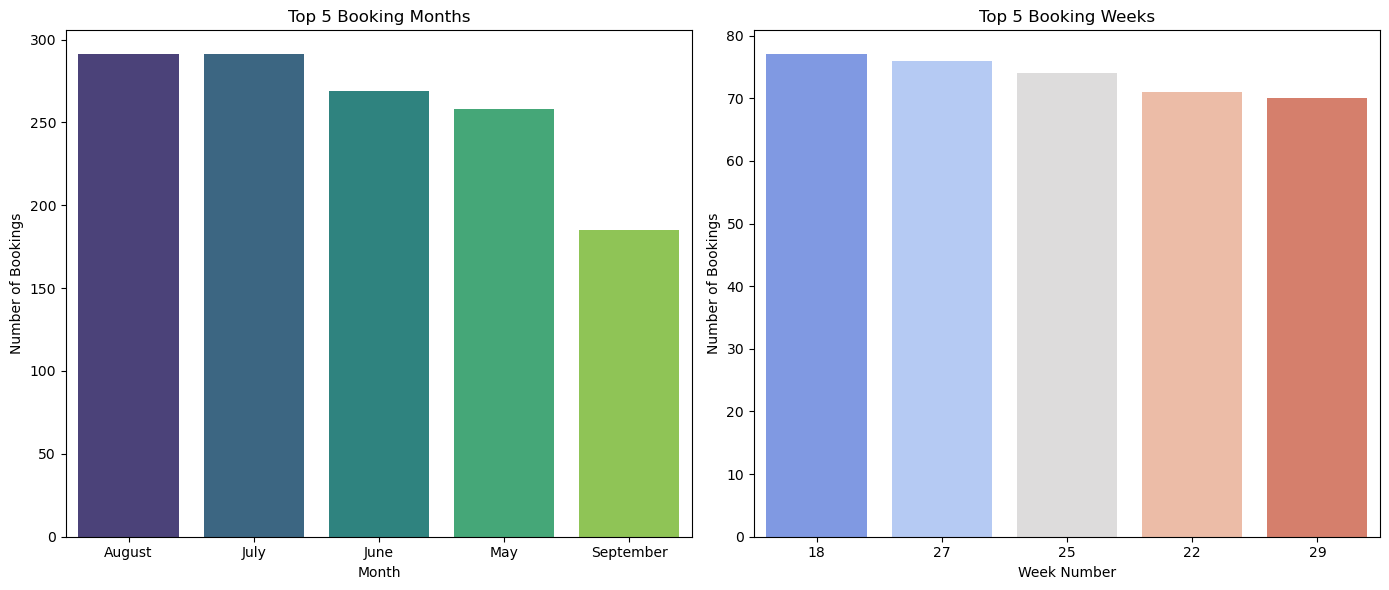

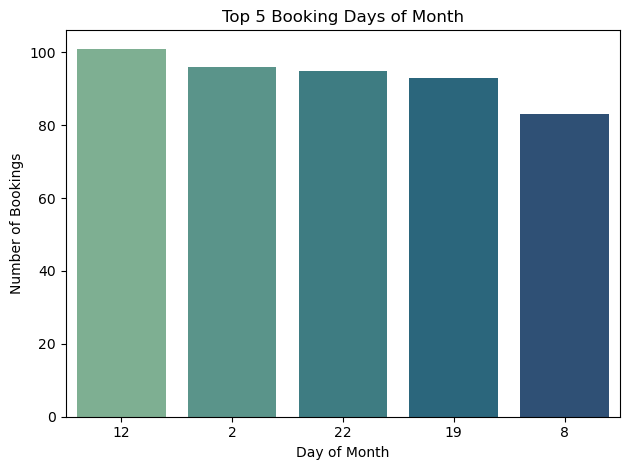

In [7]:
#Task 2: Booking Pattern Analysis

# Get top 5 months with highest bookings

monthly_bookings = df.groupby('arrival_date_month').size().sort_values(ascending=False).head(5)
monthly_bookings

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.barplot(x=monthly_bookings.index, y=monthly_bookings.values, palette='viridis')
plt.title('Top 5 Booking Months')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')

# Get top 5 weeks with highest bookings
week_counts = df['arrival_date_week_number'].value_counts().sort_values(ascending=False).head(5)

plt.subplot(1, 2, 2)
sns.barplot(x=week_counts.index.astype(str), y=week_counts.values, palette='coolwarm')
plt.title('Top 5 Booking Weeks')
plt.xlabel('Week Number')
plt.ylabel('Number of Bookings')
plt.tight_layout()
plt.show()

# Get top 5 days of month with highest bookings
day_counts = df['arrival_date_day_of_month'].value_counts().sort_values(ascending=False).head(5)

sns.barplot(x=day_counts.index.astype(str), y=day_counts.values, palette='crest')
plt.title('Top 5 Booking Days of Month')
plt.xlabel('Day of Month')
plt.ylabel('Number of Bookings')
plt.tight_layout()
plt.show()

### Interpretation for Task 2: Booking Pattern Analysis

**I. Peak Booking Periods**

**By Month:**
The highest booking activity occurs in July and August, followed by June and May. These months represent the summer holiday season, which is typically a peak travel period.

**By Week:**
Weeks 18, 27, 25, 22, and 29 see the highest booking counts. These weeks correspond to late spring and summer, consistent with the monthly trend.

**By Day of Month:**
The most popular booking days are 2nd, 8th, 12th, 19th, and 22nd. This could reflect payroll cycles, weekends, or marketing campaigns influencing guest booking decisions.

**Interpretation:** The hotel experiences strong seasonality, with bookings concentrated in the summer months and peaking around specific weeks and days. This insight helps plan staffing, inventory, and promotional campaigns.

### II. Is there a relationship between lead time and the likelihood of a booking being cancelled?

In [8]:
#II.

corr_lead_canceled = df[['lead_time', 'is_canceled']].corr()
print(corr_lead_canceled)

print("\nThe correlation coeffient is 0.139926. This shows that there is a very weak positive relationship between lead time and the likelihood of a booking being cancelled")

             lead_time  is_canceled
lead_time     1.000000     0.139926
is_canceled   0.139926     1.000000

The correlation coeffient is 0.139926. This shows that there is a very weak positive relationship between lead time and the likelihood of a booking being cancelled


**II. Relationship Between Lead Time and Booking Cancellation**

- The correlation coefficient between lead_time and is_canceled is 0.1399.

- This indicates a very weak positive relationship: as lead time increases, the likelihood of cancellation increases slightly.

**Interpretation:** Guests booking far in advance are marginally more likely to cancel, possibly due to changes in travel plans.

### III. How do booking patterns vary by month, week, and day of the week?

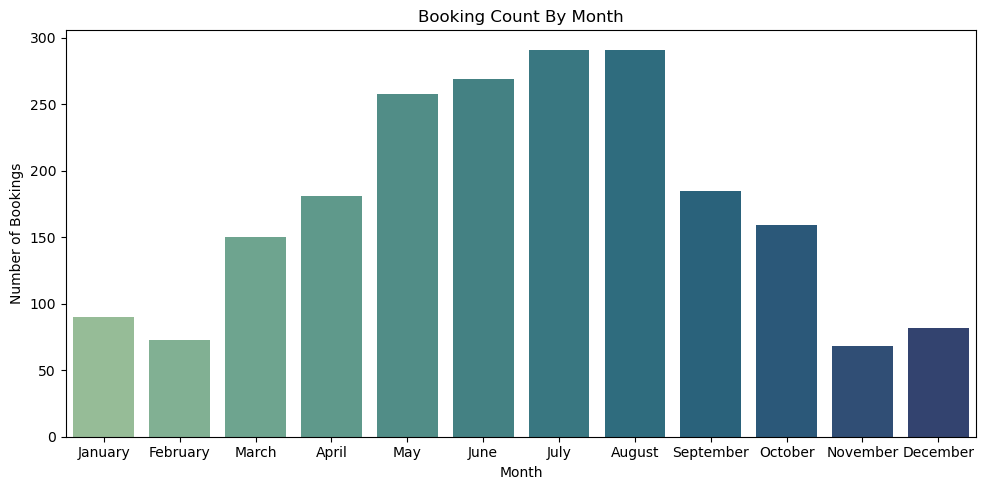

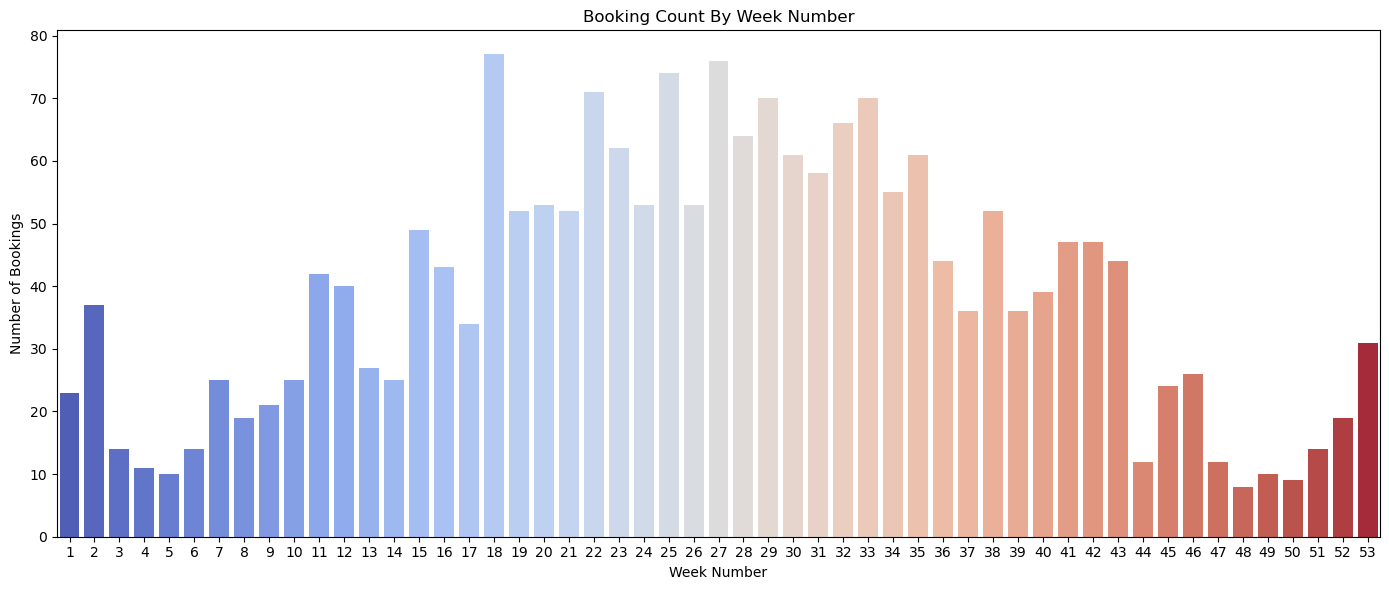

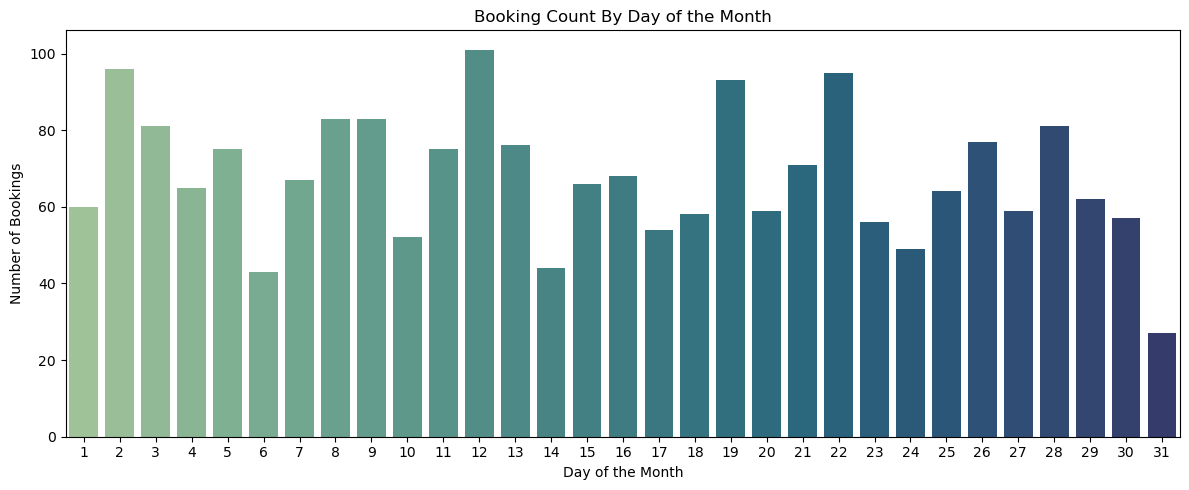

In [9]:
#III.

#Booking Patterns variation by month
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

plt.figure(figsize=(10,5))
sns.countplot(x='arrival_date_month', data=df, order = month_order, palette = 'crest')
plt.title('Booking Count By Month')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.tight_layout()
plt.show()

#Booking Patterns variation by week
plt.figure(figsize=(14,6))
sns.countplot(x='arrival_date_week_number', data=df, palette = 'coolwarm')
plt.title('Booking Count By Week Number')
plt.xlabel('Week Number')
plt.ylabel('Number of Bookings')
plt.tight_layout()
plt.show()

#Booking Patterns variation by day of the week
plt.figure(figsize=(12,5))
sns.countplot(x='arrival_date_day_of_month', data=df, palette = 'crest')
plt.title('Booking Count By Day of the Month')
plt.xlabel('Day of the Month')
plt.ylabel('Number of Bookings')
plt.tight_layout()
plt.show()

**III. Variation of Booking Patterns**

**Monthly:**
Clear seasonality – bookings surge in summer (May–August) and drop in winter (November–February).

**Weekly:**
Steady bookings in weeks 17–35, then a decline towards year-end.

**Daily:**
Higher booking activity is spread across early and mid-month days (2nd, 12th, 19th, 22nd), showing no extreme daily skew.

**Interpretation:**

- Hotels can target summer peak months with premium pricing and promotional packages.

- During low months, discounts and campaigns can help maintain occupancy.

- For weeks and days with consistent demand, operations should ensure resource allocation (staffing, housekeeping, F&B) matches booking surges.

**Summary of Task 2 Findings:**

- **Peak season:** Summer (July–August).

- **Weak positive relationship:** Longer lead time → slightly higher cancellations.

- Booking patterns vary significantly by season, moderately by week, and less strongly by day of month.

## Task 3: Booking Cancellation Analysis

### I. What factors influence booking cancellations?

is_canceled                       1.000000
arrival_date_year                 0.177728
lead_time                         0.139926
adr                               0.138885
stays_in_week_nights              0.096881
children                          0.087265
stays_in_weekend_nights           0.082658
adults                            0.072950
company                           0.051797
arrival_date_week_number         -0.009932
previous_bookings_not_canceled   -0.011895
arrival_date_day_of_month        -0.025284
babies                           -0.030012
is_repeated_guest                -0.041772
booking_changes                  -0.057613
days_in_waiting_list             -0.060892
agent                            -0.125668
total_of_special_requests        -0.144737
required_car_parking_spaces      -0.150999
previous_cancellations                 NaN
Name: is_canceled, dtype: float64


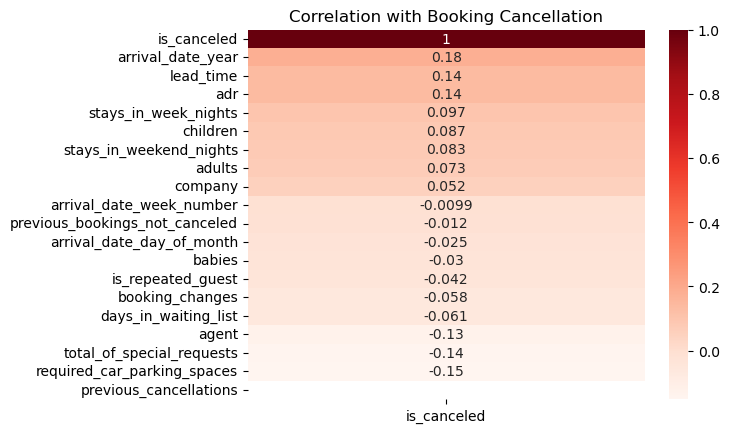

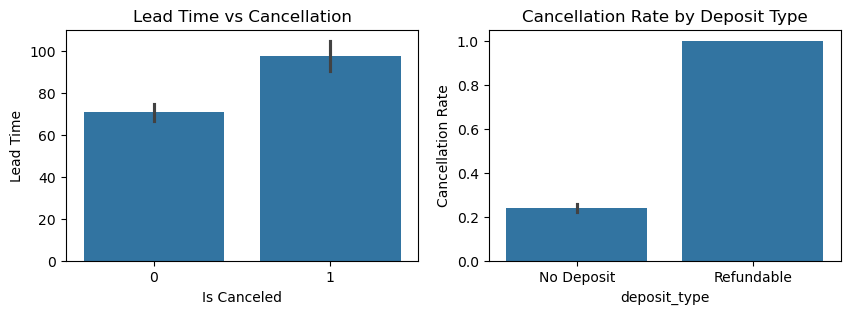

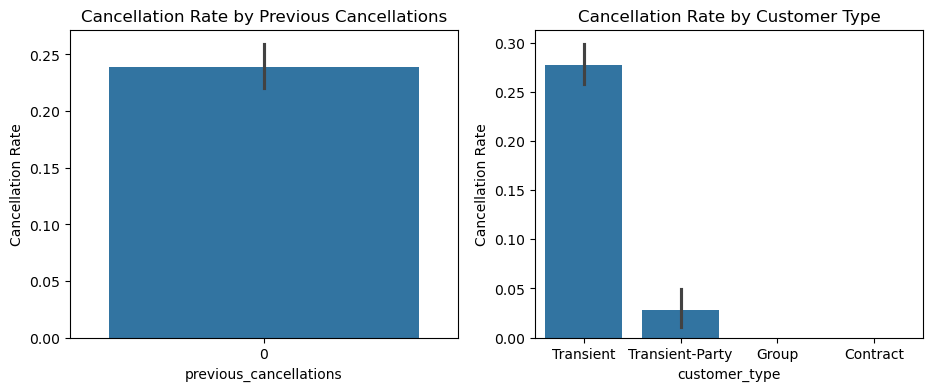

In [10]:
#Task 3: Booking Cancellation Analysis

#I.

#Correlation of all numeric columns with is_canceled
canceled_correlation = df.corr(numeric_only = True)['is_canceled'].sort_values(ascending=False)
print(canceled_correlation)

sns.heatmap(df.corr(numeric_only=True)[['is_canceled']].sort_values(by='is_canceled', ascending=False), annot=True, cmap='Reds')
plt.title('Correlation with Booking Cancellation')
plt.show()

#Correlation of categorical columns with is_canceled
# 1. Lead Time
plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 1)
sns.barplot(x='is_canceled', y='lead_time', data=df)
plt.title('Lead Time vs Cancellation')
plt.xlabel('Is Canceled')
plt.ylabel('Lead Time')

# 2. Deposit Type
plt.subplot(1, 2, 2)
sns.barplot(x='deposit_type', y='is_canceled', data=df)
plt.title('Cancellation Rate by Deposit Type')
plt.ylabel('Cancellation Rate')
plt.show()

# 3. Previous Cancellations
plt.figure(figsize=(11, 4))
plt.subplot(1, 2, 1)
sns.barplot(x='previous_cancellations', y='is_canceled', data=df)
plt.title('Cancellation Rate by Previous Cancellations')
plt.ylabel('Cancellation Rate')

# 4. Customer Type
plt.subplot(1, 2, 2)
sns.barplot(x='customer_type', y='is_canceled', data=df)
plt.title('Cancellation Rate by Customer Type')
plt.ylabel('Cancellation Rate')
plt.show()

### Interpretation for Task 3: Booking Cancellation Analysis

**I. Factors Influencing Booking Cancellations**

The correlation heatmap and categorical plots reveal the following key factors:

**Lead Time**

- Longer lead times are weakly positively correlated with cancellations.
- Guests booking far in advance are slightly more likely to cancel.

**Deposit Type**

- Bookings with Refundable deposits have the highest cancellation rates, while No Deposit bookings are less likely to cancel.

**Customer Type**

- Transient customers (individual travelers without groups or contracts) show the highest cancellation rate.
- Group and contract customers have significantly lower cancellations.

**Previous Cancellations**
- Guests with a history of cancellations are more likely to cancel again.

**Other Factors**

- ADR and total nights show weak but positive correlation with cancellations.
- Special requests and car parking negatively correlate (customers who make requests or need parking are less likely to cancel).

**Interpretation:** Cancellation risk is most strongly influenced by deposit type, customer type, and booking behavior (lead time & previous cancellations).

### II. Are there specific trends or patterns in cancellations over time?

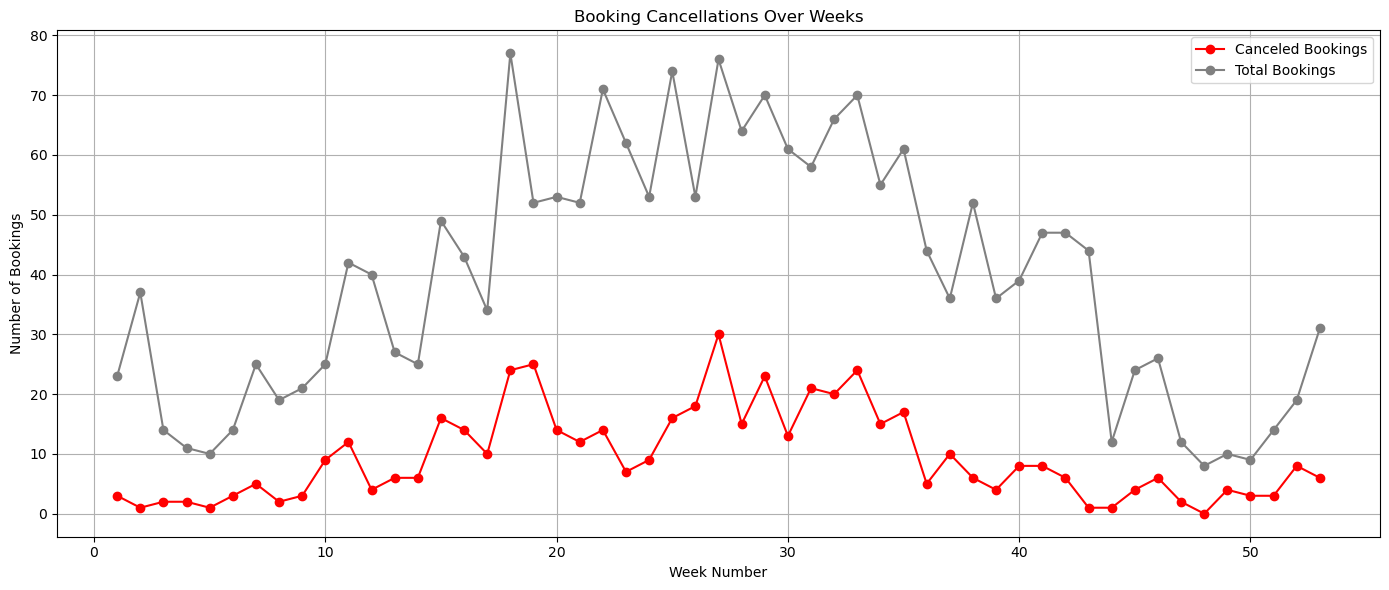

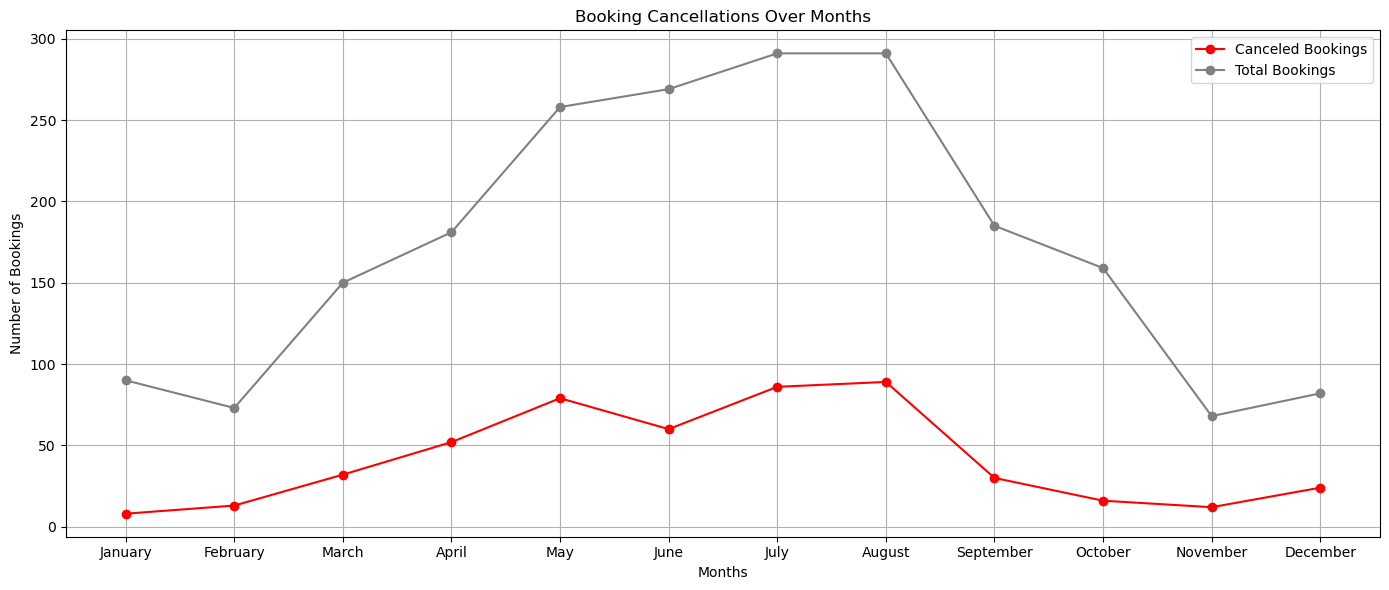

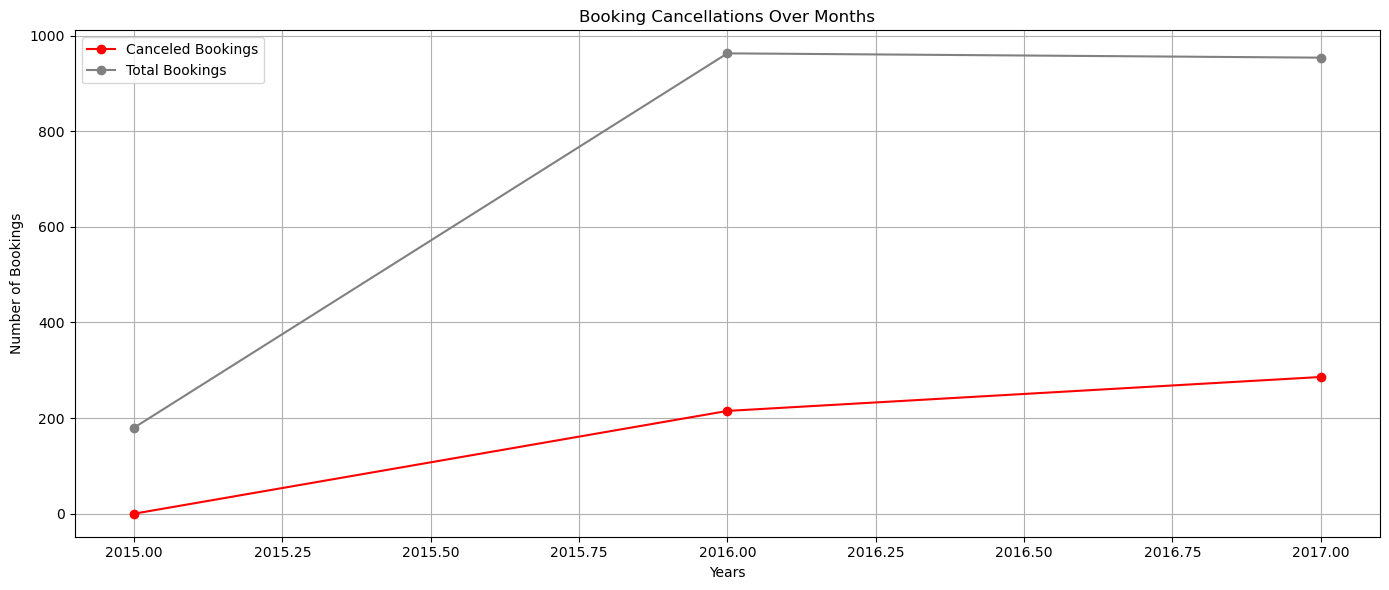

In [11]:
#II.

# Line graph for cancellations over weeks
weekly_canceled_pattern = df.groupby('arrival_date_week_number').agg(
    weekly_total_bookings=('is_canceled', 'count'),
    weekly_canceled_bookings=('is_canceled', 'sum')).sort_index()

plt.figure(figsize=(14, 6))
plt.plot(weekly_canceled_pattern.index, weekly_canceled_pattern['weekly_canceled_bookings'], label='Canceled Bookings', color='red', marker='o')
plt.plot(weekly_canceled_pattern.index, weekly_canceled_pattern['weekly_total_bookings'], label='Total Bookings', color='gray', marker='o')
plt.title('Booking Cancellations Over Weeks')
plt.xlabel('Week Number')
plt.ylabel('Number of Bookings')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#Line graph for cancellations over months

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

monthly_canceled_pattern = df.groupby('arrival_date_month').agg(
    monthly_total_bookings = ('is_canceled', 'count'),
    monthly_canceled_bookings = ('is_canceled', 'sum')).reindex(month_order)

plt.figure(figsize=(14,6))
plt.plot(monthly_canceled_pattern.index, monthly_canceled_pattern['monthly_canceled_bookings'], label='Canceled Bookings', color='red', marker='o')
plt.plot(monthly_canceled_pattern.index, monthly_canceled_pattern['monthly_total_bookings'], label='Total Bookings', color='gray', marker='o')
plt.title('Booking Cancellations Over Months')
plt.xlabel('Months')
plt.ylabel('Number of Bookings')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#Line graph for cancellations over years

yearly_canceled_pattern = df.groupby('arrival_date_year').agg(
    yearly_total_bookings = ('is_canceled', 'count'),
    yearly_canceled_bookings = ('is_canceled', 'sum'))

plt.figure(figsize=(14,6))
plt.plot(yearly_canceled_pattern.index, yearly_canceled_pattern['yearly_canceled_bookings'], label='Canceled Bookings', color='red', marker='o')
plt.plot(yearly_canceled_pattern.index, yearly_canceled_pattern['yearly_total_bookings'], label='Total Bookings', color='gray', marker='o')
plt.title('Booking Cancellations Over Months')
plt.xlabel('Years')
plt.ylabel('Number of Bookings')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**II. Trends and Patterns in Cancellations Over Time**

**By Week:**
- Cancellation patterns mirror overall booking volumes.
- Weeks with high booking activity (summer) also show higher cancellations.

**By Month:**
- Highest cancellations occur in July and August, aligning with peak booking demand.
- Lower cancellations are seen in winter months (November–February).

**By Year:**
- Cancellations have increased steadily from 2015 → 2017, both in volume and rate.
- Suggests growing cancellation behavior in customers, possibly due to online booking flexibility.

**Interpretation:** Cancellations are seasonal (peaking in summer), and increasing year-over-year, which hotels must plan for.

### III. Can we identify high-risk bookings that are more likely to be canceled?

High-Risk Bookings Summary:
risk_score
3    1064
2     709
4     316
1       8
Name: count, dtype: int64

Sample High-Risk Bookings:
           hotel  is_canceled  lead_time  arrival_date_year  \
22  Resort Hotel            0        130               2015   
37  Resort Hotel            1        114               2016   
38  Resort Hotel            1        114               2016   
39  Resort Hotel            1        114               2016   
40  Resort Hotel            1        114               2016   
41  Resort Hotel            1        114               2016   
42  Resort Hotel            1        114               2016   
44  Resort Hotel            1         91               2016   
49  Resort Hotel            1        123               2016   
50  Resort Hotel            1        124               2016   

   arrival_date_month  arrival_date_week_number  arrival_date_day_of_month  \
22            October                        42                         16   
37               

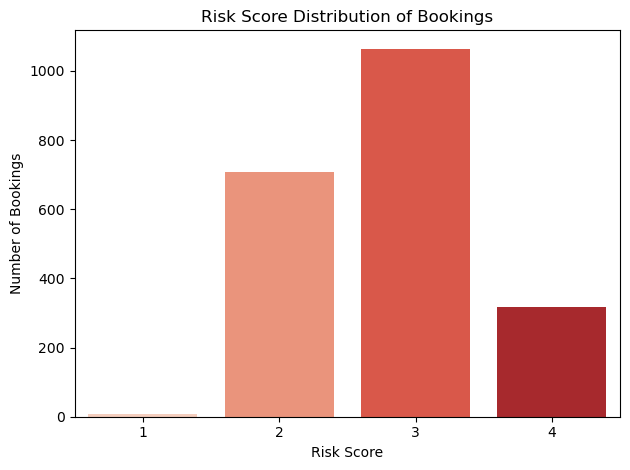

In [12]:
#III.

df['risk_score'] = (
    (df['lead_time'] > df['lead_time'].mean()).astype(int) +
    (df['deposit_type'] == 'No Deposit').astype(int) +
    (df['is_repeated_guest'] == 0).astype(int) +
    (df['previous_cancellations'] > 0).astype(int) +
    (df['total_of_special_requests'] == 0).astype(int)
)

# Display high-risk bookings summary
print("High-Risk Bookings Summary:")
print(df['risk_score'].value_counts())

# Show top 10 high-risk bookings
print("\nSample High-Risk Bookings:")
print(df[df['risk_score'] == 4].head(10))

#Bar graph for Risk Score Distribution
sns.countplot(x='risk_score', data=df, palette='Reds')
plt.title('Risk Score Distribution of Bookings')
plt.xlabel('Risk Score')
plt.ylabel('Number of Bookings')
plt.tight_layout()
plt.show()

**III. Identifying High-Risk Bookings**

A Risk Score was created using customer behavior variables:

+1 if Lead Time > average

+1 if Deposit Type = No Deposit

+1 if Is Repeated Guest = 0

+1 if Previous Cancellations > 0

+1 if Special Requests = 0

**Findings:**
- Most bookings fall in Risk Score 2–3 range.
- High-Risk Bookings (score 4) exist, though less frequent.
- Example bookings show long lead times, no deposit, and no special requests — strong indicators of possible cancellations.

**Interpretation:** Hotels can use the risk scoring system to flag and monitor high-risk bookings. Targeted strategies (deposit requirements, stricter cancellation policies, or reminder communications) can reduce cancellation losses.

**Summary of Task 3 Findings:**
- Key factors: Deposit type, customer type, lead time, and previous cancellations.
- Trends: Cancellations peak in summer months and are rising yearly.
- High-risk bookings: Can be predicted using a simple risk score model, helping hotels mitigate financial losses.

## Task 4: Customer Behavioral Segmentation

### I. Are there distinct patterns in the lead time, special requests, or room preferences for different customer segments?

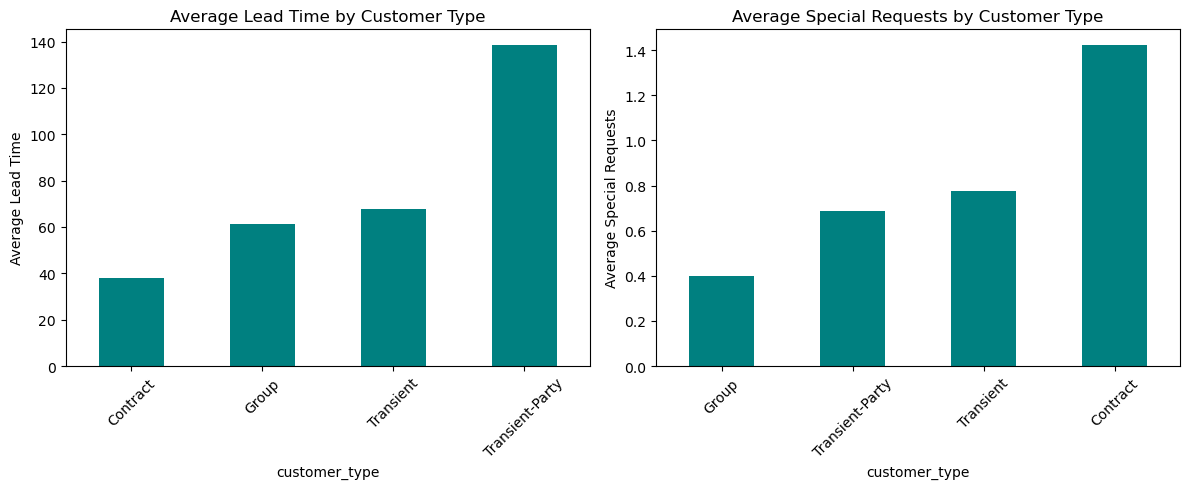

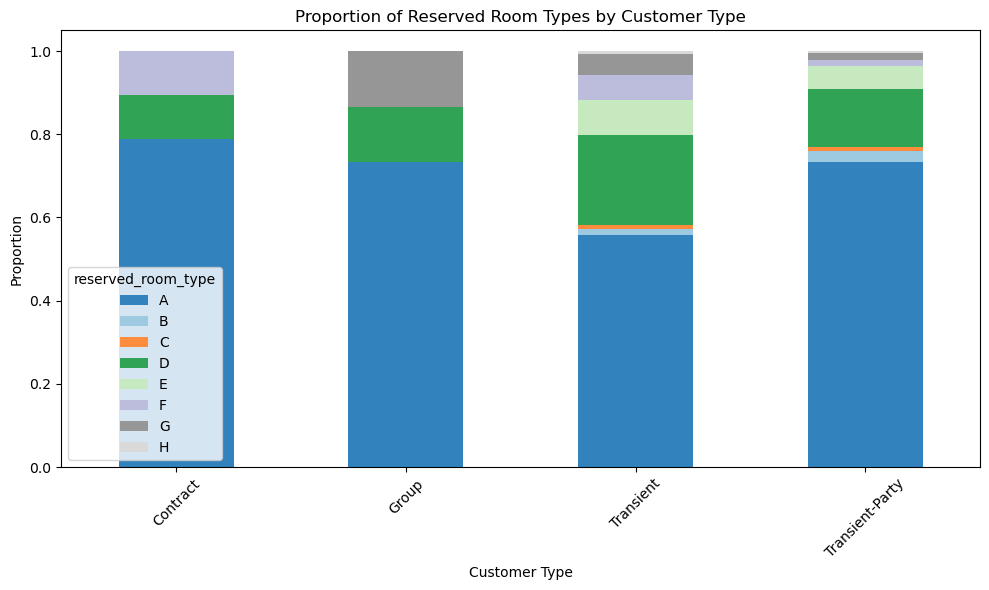

In [13]:
#Bar plot for customer type and lead time

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
df.groupby('customer_type')['lead_time'].mean().sort_values().plot(kind='bar', color='teal')
plt.title('Average Lead Time by Customer Type')
plt.ylabel('Average Lead Time')
plt.xticks(rotation=45)

#Bar plot for customer type and special requests

plt.subplot(1, 2, 2)
df.groupby('customer_type')['total_of_special_requests'].mean().sort_values().plot(kind='bar', color='teal')
plt.title('Average Special Requests by Customer Type')
plt.ylabel('Average Special Requests')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Stacked Bar graph for customer type and room preferences
room_pref_counts = df.groupby(['customer_type', 'reserved_room_type']).size().unstack().fillna(0)

room_pref_pct = room_pref_counts.div(room_pref_counts.sum(axis=1), axis=0)

room_pref_pct.plot(kind='bar', stacked=True, colormap='tab20c', figsize=(10, 6))
plt.title('Proportion of Reserved Room Types by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Interpretation for Task 4: Customer Behavioral Segmentation

**I. Patterns in Lead Time, Special Requests, and Room Preferences**

**Lead Time**
- Transient-Party customers book with the longest lead times (often several months in advance).
- Contract customers typically book with short lead times, indicating last-minute or fixed arrangements.
- Group bookings also have shorter lead times compared to transient customers.

**Special Requests**
- Contract customers have the highest average number of special requests, likely due to business or long-term requirements.
- Transient and Transient-Party customers make fewer requests on average, indicating more flexible or price-driven bookings.

**Room Preferences**
- Room type A dominates across all segments.
- Transient customers show the widest variation in reserved room types (A, D, E, F).
- Contract customers heavily prefer Room A, while Group customers also reserve Room G more frequently.

**Interpretation:**
**Customer segments display distinct booking patterns:**
- Transient-Party: long lead time, fewer requests.
- Contract: short lead time, many requests, uniform room preference.
- Transient: broad room choices, moderate requests.
- Group: low requests, certain alternative room preferences.

### II. Which marketing channels are the most effective for reaching specific customer segments?

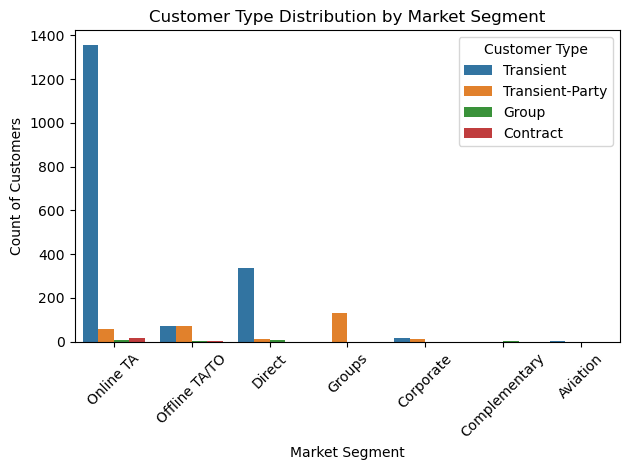

In [14]:
sns.countplot(x='market_segment', hue='customer_type', data=df)
plt.title('Customer Type Distribution by Market Segment')
plt.xlabel('Market Segment')
plt.ylabel('Count of Customers')
plt.legend(title='Customer Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**II. Marketing Channels Effectiveness**

**Online Travel Agencies (OTA)**
- The largest channel, dominated by Transient customers.
- Effective for reaching price-sensitive, individual travelers.

**Offline TA/TO**
- Mix of Transient and Transient-Party customers.
- Works better for family or group-oriented bookings.

**Direct Bookings**
- Mostly Transient customers.
- Represents customers who trust the brand and avoid intermediaries.

**Corporate / Contract**
- Exclusively tied to Contract customers.
- Strong for business travel and fixed company agreements.

**Group Segment**
- Primarily Group customers.
- Suitable for conferences, weddings, and bulk reservations.

**Interpretation:**
- OTA - best for Transient customers.
- Direct - strengthens loyalty with repeat or brand-trusting customers.
- Corporate/Contract - best channel for business partnerships.
- Groups - specialized for bulk reservations.

### III. How can marketing strategies be customized to resonate with specific customer segments, considering factors such as previous cancellations, booking lead time, and special requests?

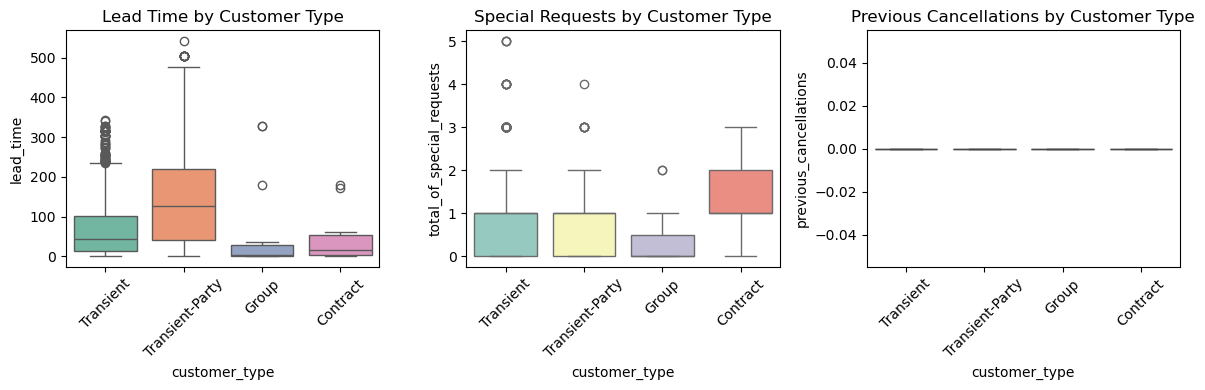

In [15]:
# Plot 1: Lead Time by Customer Type
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
sns.boxplot(data=df, x='customer_type', y='lead_time', palette="Set2")
plt.title('Lead Time by Customer Type')
plt.xticks(rotation=45)

# Plot 2: Special Requests by Customer Type
plt.subplot(1, 3, 2)
sns.boxplot(data=df, x='customer_type', y='total_of_special_requests', palette="Set3")
plt.title('Special Requests by Customer Type')
plt.xticks(rotation=45)

# Plot 3: Previous Cancellations by Customer Type
plt.subplot(1, 3, 3)
sns.boxplot(data=df, x='customer_type', y='previous_cancellations', palette="Set1")
plt.title('Previous Cancellations by Customer Type')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

**III. Customizing Marketing Strategies**

**Transient Customers**
- Strategy: Promote via OTA & Direct bookings with discounts.
- Emphasize flexibility and room variety.

**Transient-Party Customers**
- Strategy: Family/group packages, longer lead time promotions.
- Encourage early-bird offers and bundle deals.

**Contract Customers**
- Strategy: Focus on business loyalty programs, meeting rooms, and special amenities.
- Highlight ability to fulfill special requests.

**Group Customers**
- Strategy: Target event organizers (weddings, conferences, tours).
- Provide bulk booking discounts and custom room packages.

**Interpretation:**
Marketing should be customer-type specific:
- Transient = price-focused
- Transient-Party = family & early planning focus
- Contract = corporate benefits & special requests
- Group = event-oriented promotions

**Summary of Task 4 Findings:**
- Booking behavior varies significantly by customer type in terms of lead time, requests, and room choice.
- Marketing channels align with these customer behaviors (e.g., OTAs for transient, corporate for contract).
- Hotels can tailor marketing strategies by aligning promotions and offers with each segment’s unique behavior.

## Task 5: Revenue Management

### I. How does the Average Daily Rate (ADR) vary over time?

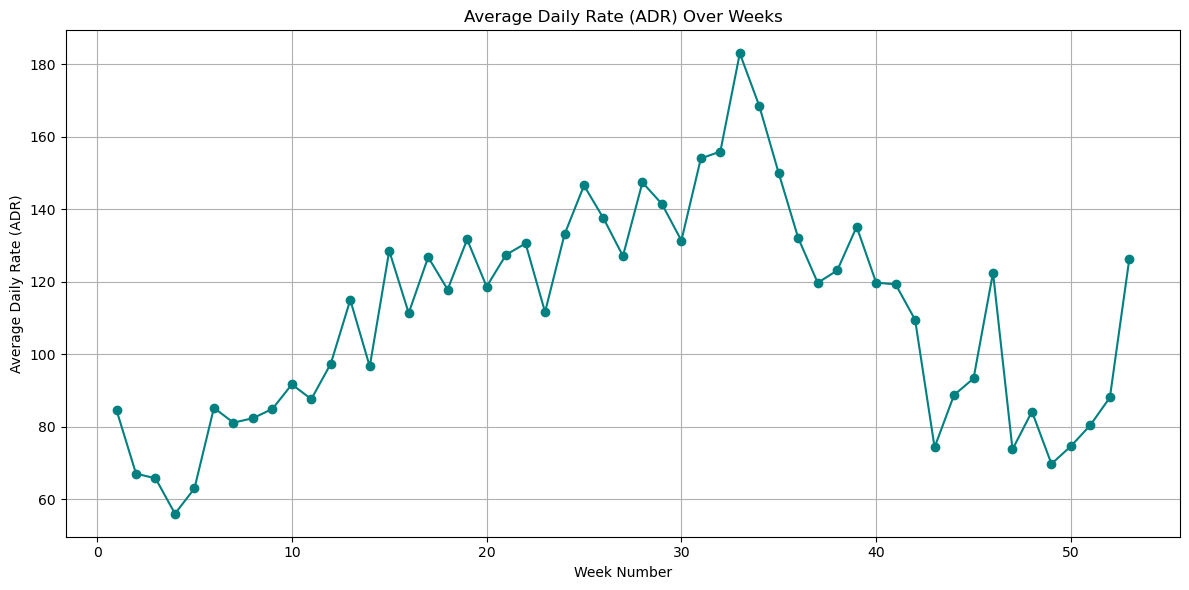

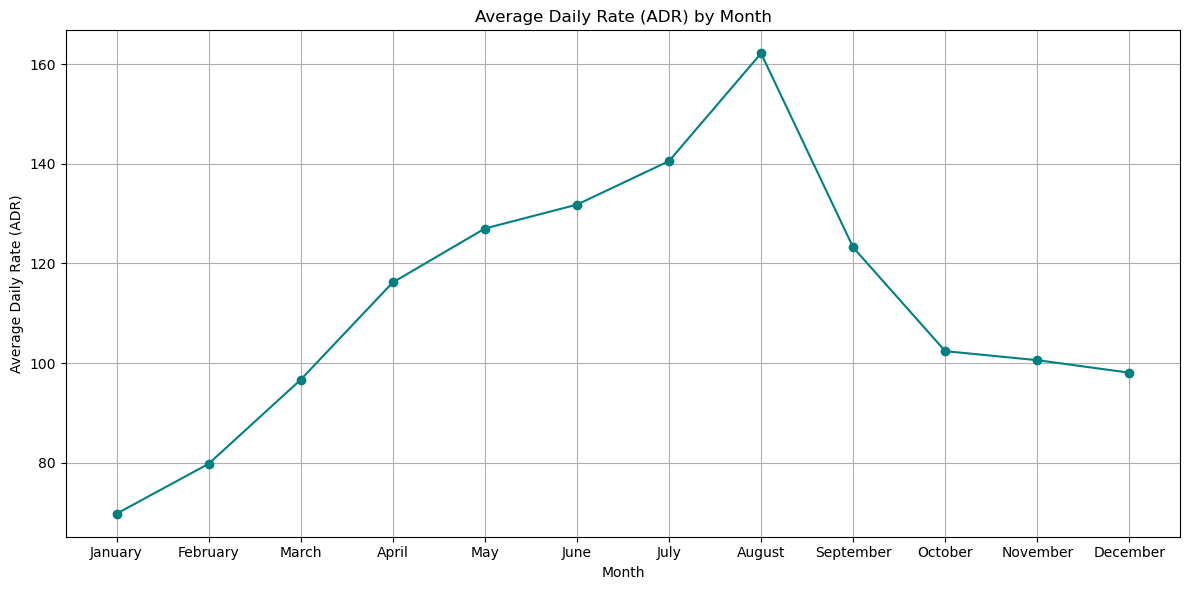

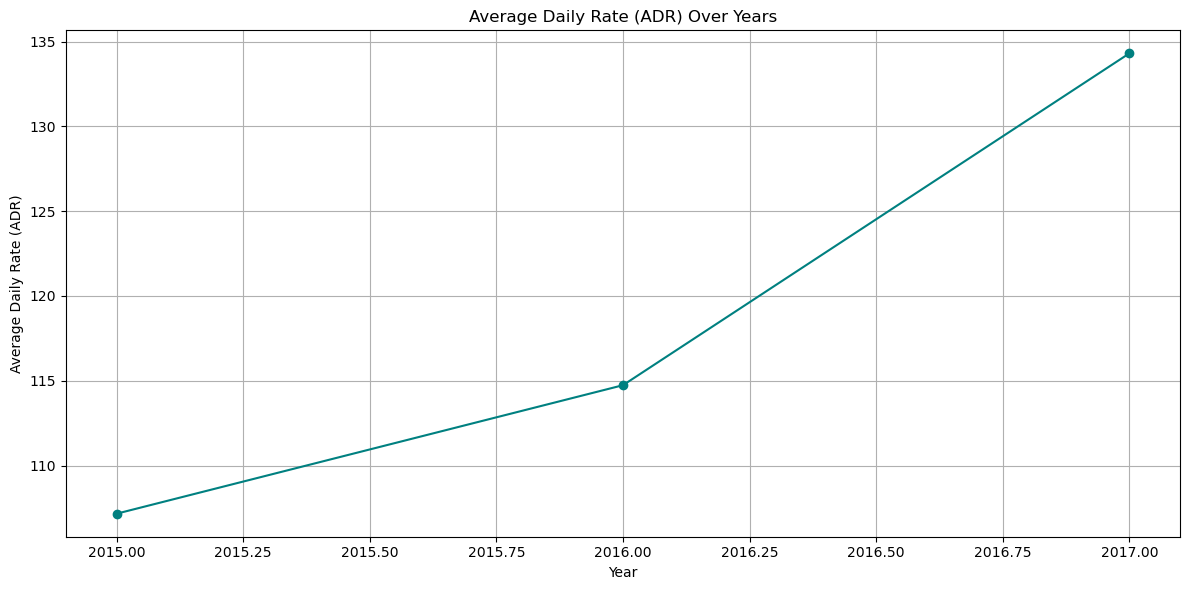

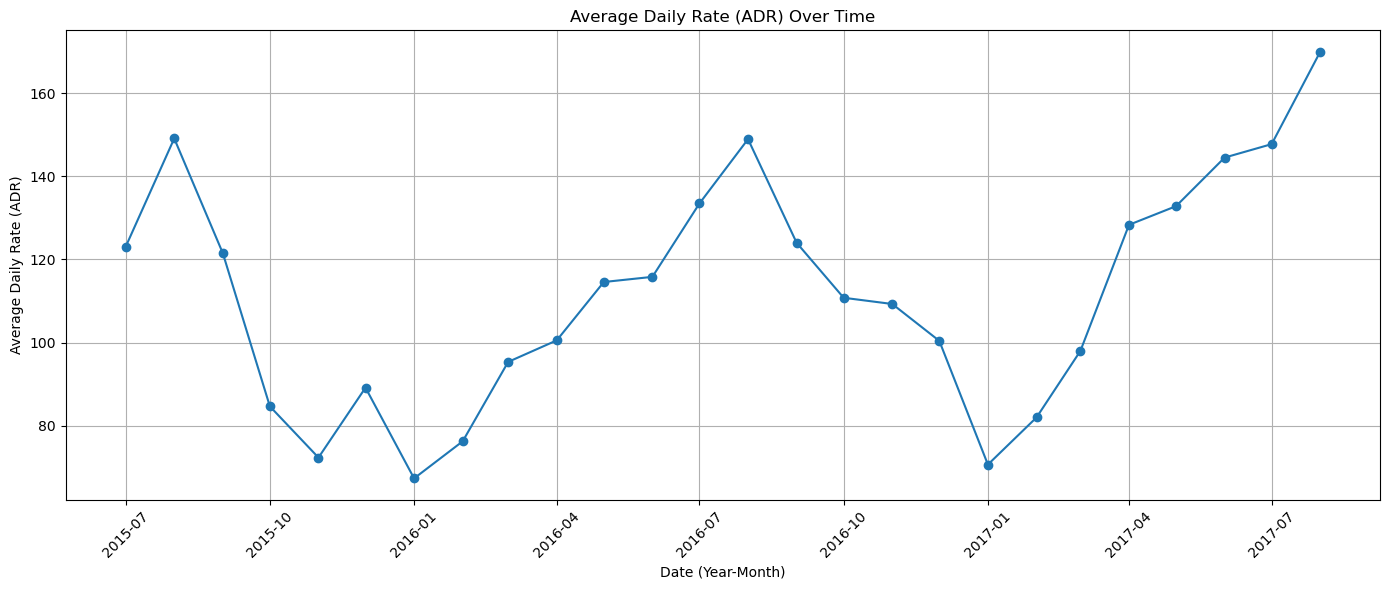

In [16]:
#Line graph of Average Daily Rate (ADR) over weeks

weekly_number_adr = df.groupby('arrival_date_week_number')['adr'].mean().sort_index()

plt.figure(figsize=(12,6))
plt.plot(weekly_number_adr.index, weekly_number_adr.values, marker='o', color='teal')
plt.title('Average Daily Rate (ADR) Over Weeks')
plt.xlabel('Week Number')
plt.ylabel('Average Daily Rate (ADR)')
plt.grid(True)
plt.tight_layout()
plt.show()

#Line graph of Average Daily Rate (ADR) over months

month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

monthly_adr = df.groupby('arrival_date_month')['adr'].mean().reindex(month_order)

plt.figure(figsize=(12,6))
plt.plot(monthly_adr.index, monthly_adr.values, marker='o', color='teal')
plt.title('Average Daily Rate (ADR) by Month')
plt.xlabel('Month')
plt.ylabel('Average Daily Rate (ADR)')
plt.grid(True)
plt.tight_layout()
plt.show()

#Line graph of Average Daily Rate (ADR) over years

yearly_adr = df.groupby('arrival_date_year')['adr'].mean().sort_index()

plt.figure(figsize=(12,6))
plt.plot(yearly_adr.index, yearly_adr.values, marker='o', color='teal')
plt.title('Average Daily Rate (ADR) Over Years')
plt.xlabel('Year')
plt.ylabel('Average Daily Rate (ADR)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Create a year-month column for sorting
df['year_month'] = pd.to_datetime(df['arrival_date_year'].astype(str) + '-' + df['arrival_date_month'].astype(str))

# Calculate average ADR by year-month
year_month_adr = df.groupby('year_month')['adr'].mean().sort_index()

# Plot
plt.figure(figsize=(14,6))
plt.plot(year_month_adr.index, year_month_adr.values, marker='o', linestyle='-')
plt.title('Average Daily Rate (ADR) Over Time')
plt.xlabel('Date (Year-Month)')
plt.ylabel('Average Daily Rate (ADR)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


### Interpretation for Task 5: Revenue Management

**I. How does the Average Daily Rate (ADR) vary over time?**

**Weekly Trend:**
ADR fluctuates significantly week by week, with peaks around mid-year (weeks 25–35), coinciding with the summer/holiday season. ADR drops toward the year-end (weeks 45–50).

**Monthly Trend:**
ADR gradually increases from January (lowest ~70) to a peak in August (~160+), then declines again by December. This indicates strong seasonality in pricing.

**Yearly Trend:**
ADR shows a steady upward trend year over year (2015 → 2017), suggesting inflation, improved demand, or refined pricing strategies.

**Time Series View:**
ADR has cyclical seasonal spikes (summer & early fall) followed by sharp declines (winter months).

**Insight:** 

Hotels adopt a seasonal pricing strategy — charging higher ADR in peak travel months (summer) and lowering rates in off-season months (winter)

### II. Can we identify pricing strategies that maximize revenue?

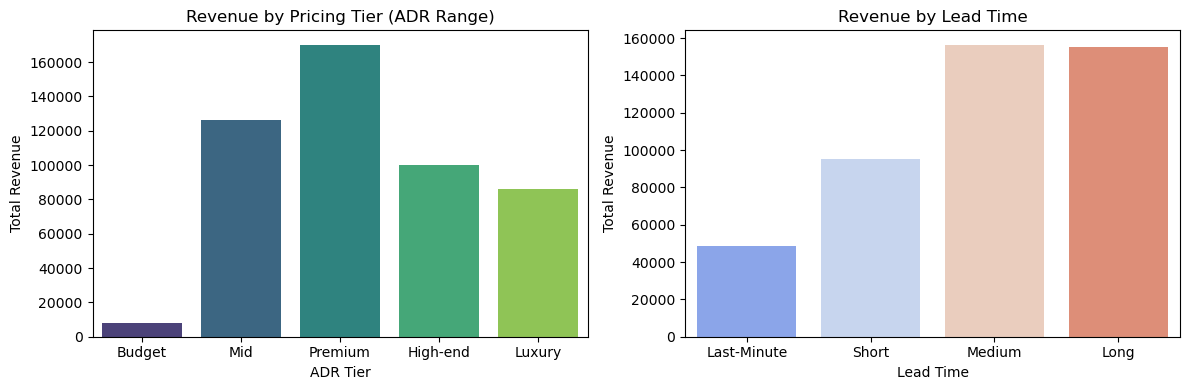

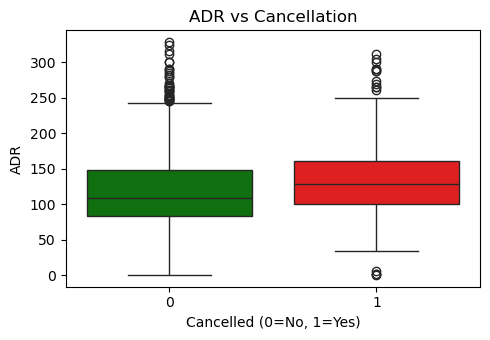

In [17]:
# Basic revenue preparation
df['total_nights'] = df['stays_in_week_nights'] + df['stays_in_weekend_nights']
df['revenue'] = df['adr'] * df['total_nights']
confirmed = df[df['is_canceled'] == 0].copy()

# Revenue by ADR Tier
adr_bins = [0, 50, 100, 150, 200, 500]
adr_labels = ['Budget', 'Mid', 'Premium', 'High-end', 'Luxury']
confirmed['adr_range'] = pd.cut(confirmed['adr'], bins=adr_bins, labels=adr_labels)

revenue_by_adr = confirmed.groupby('adr_range')['revenue'].sum().reset_index()

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.barplot(data=revenue_by_adr, x='adr_range', y='revenue', palette='viridis')
plt.title('Revenue by Pricing Tier (ADR Range)')
plt.xlabel('ADR Tier')
plt.ylabel('Total Revenue')

# Revenue by Lead Time Range
lead_bins = [0, 7, 30, 90, 365]
lead_labels = ['Last-Minute', 'Short', 'Medium', 'Long']
confirmed['lead_time_range'] = pd.cut(confirmed['lead_time'], bins=lead_bins, labels=lead_labels)

rev_by_lead = confirmed.groupby('lead_time_range')['revenue'].sum().reset_index()

plt.subplot(1, 2, 2)
sns.barplot(data=rev_by_lead, x='lead_time_range', y='revenue', palette='coolwarm')
plt.title('Revenue by Lead Time')
plt.xlabel('Lead Time')
plt.ylabel('Total Revenue')
plt.tight_layout()
plt.show()

# ADR vs Cancellation Insight
plt.figure(figsize=(5, 3.5))
sns.boxplot(data=df, x='is_canceled', y='adr', palette=['green', 'red'])
plt.title('ADR vs Cancellation')
plt.xlabel('Cancelled (0=No, 1=Yes)')
plt.ylabel('ADR')
plt.tight_layout()
plt.show()


**II. Can we identify pricing strategies that maximize revenue?**

**Revenue by ADR Tier:**
- The Premium tier generates the highest revenue, even more than Luxury.
- Mid-tier rooms also contribute strongly.
- Budget rooms bring minimal revenue.

**Revenue by Lead Time:**
- Medium and Long lead times generate the highest revenue.
- Last-minute bookings generate the least, though they may help fill occupancy gaps.

**ADR vs Cancellation:**
- Higher ADR bookings are more likely to get cancelled.
- Suggests that pricing too high increases cancellation risk.

**Insight:**
- Focus on premium/mid-tier ADR ranges for maximizing revenue.
- Encourage advance bookings (medium/long lead times) through discounts or incentives.
- Avoid overpricing to reduce cancellations.

### III. Are there specific room types associated with higher ADR?

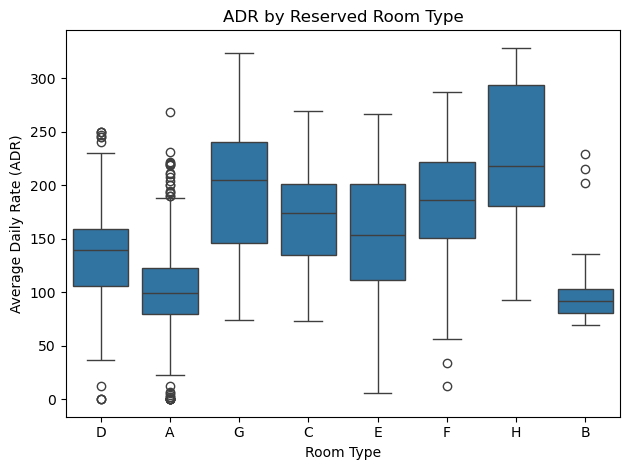

In [18]:
sns.boxplot(data=df, x='reserved_room_type', y='adr')
plt.title('ADR by Reserved Room Type')
plt.xlabel('Room Type')
plt.ylabel('Average Daily Rate (ADR)')
plt.tight_layout()
plt.show()


**III. Are there specific room types associated with higher ADR?**

**Room Type H, G, F:**
These have the highest ADR ranges, often above 200, and are strongly linked with premium pricing.

**Room Type A:**
Most frequently booked, but ADR is lower (~100) → indicates it’s a volume driver rather than high-value.

**Room Type B:**
Consistently low ADR, less profitable.

**Insight:**
- Room Types H, G, F → maximize ADR, should be marketed as premium/luxury experiences.
- Room Type A → reliable revenue through volume, works well for standard travelers.
- Room Type B → low profitability, may need repositioning or bundling.

**Summary of Task 5 Findings**
- **ADR over Time** → Clear seasonality: highest in summer (July–August), lowest in winter. ADR is rising year-over-year.
- **Pricing Strategies** →
- Premium/Mid tiers generate the most revenue.
- Encourage advance bookings (longer lead time).
- High ADR leads to more cancellations, so pricing should balance value vs affordability.

- **Room Types** →
- High ADR: H, G, F → premium segment.
- High Volume but Lower ADR: A → bread-and-butter standard room.
- Low ADR: B → lowest profitability, needs attention.

## Task 6: Operational Efficiency 

### I. What is the effectiveness of different booking distribution channels?

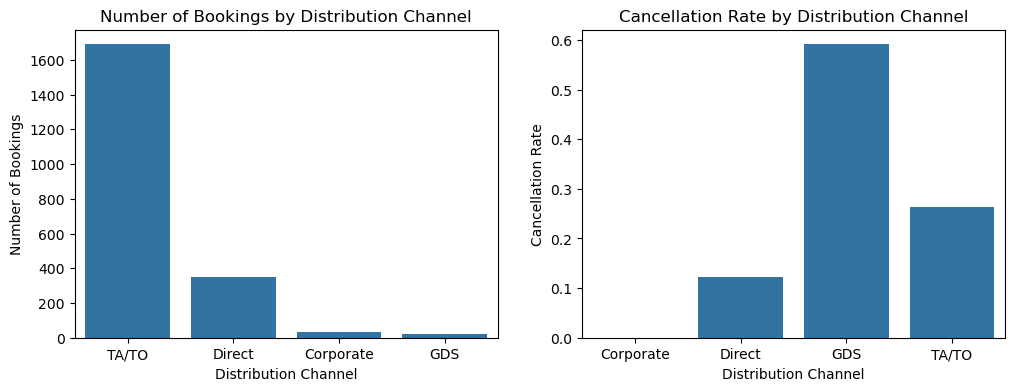

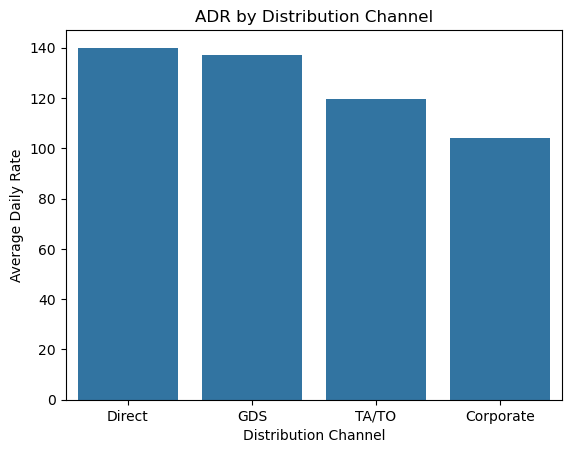

In [19]:
# Bookings count by distribution channel
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='distribution_channel')
plt.title('Number of Bookings by Distribution Channel')
plt.xlabel('Distribution Channel')
plt.ylabel('Number of Bookings')

# Cancellation rate by channel
plt.subplot(1, 2, 2)
cancel_rate = df.groupby('distribution_channel')['is_canceled'].mean().reset_index()
sns.barplot(data=cancel_rate, x='distribution_channel', y='is_canceled')
plt.title('Cancellation Rate by Distribution Channel')
plt.xlabel('Distribution Channel')
plt.ylabel('Cancellation Rate')
plt.show()

# ADR by distribution channel
adr_channel = df.groupby('distribution_channel')['adr'].mean().reset_index()
adr_channel = adr_channel.sort_values(by='adr', ascending=False)
sns.barplot(data=adr_channel, x='distribution_channel', y='adr')
plt.title('ADR by Distribution Channel')
plt.xlabel('Distribution Channel')
plt.ylabel('Average Daily Rate')
plt.show()

### Interpretation for Task 6: Operational Efficiency

**I. Effectiveness of different booking distribution channels**

**TA/TO (Travel Agents/Tour Operators)**
- Highest number of bookings.
- Cancellation rate is moderate (~26%).
- ADR (Average Daily Rate) is decent (~120).
- Effective for volume, but cancellations need attention.

**Direct Bookings**
- Fewer bookings compared to TA/TO.
- Low cancellation rate (~12%).
- Highest ADR (~140).
- This is the most profitable and reliable channel.

**Corporate**
- Lowest volume.
- Almost zero cancellations.
- Lowest ADR (~105).
- Stable but low-revenue channel.

**GDS (Global Distribution System)**
- Very few bookings.
- Highest cancellation rate (~60%).
- High ADR (~138).
- High risk → not reliable despite good pricing.

**Conclusion:**
- For volume → TA/TO is strongest.
- For profitability → Direct bookings are best.
- For stability → Corporate is safest.
- GDS is inefficient due to cancellations.

### II. How do booking changes impact hotel operations?

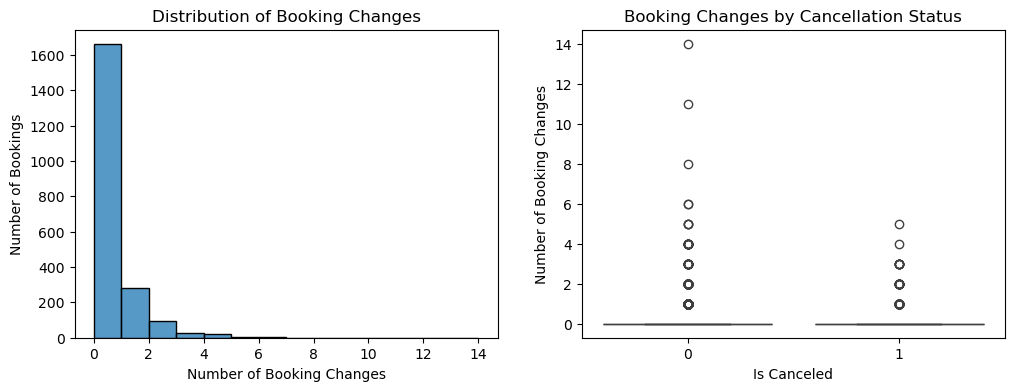

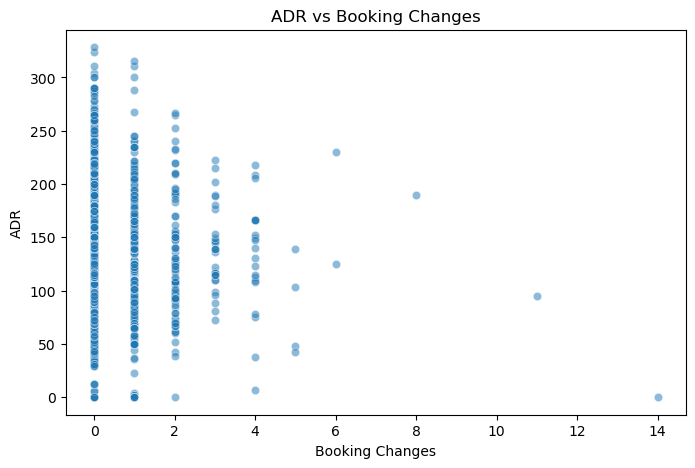

Correlation between booking changes and ADR:                  booking_changes       adr
booking_changes         1.000000  0.023629
adr                     0.023629  1.000000


In [20]:
# Distribution of booking changes
plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
sns.histplot(df['booking_changes'], bins=range(df['booking_changes'].max()+1))
plt.title('Distribution of Booking Changes')
plt.xlabel('Number of Booking Changes')
plt.ylabel('Number of Bookings')

# Correlation between booking changes and cancellation
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='is_canceled', y='booking_changes')
plt.title('Booking Changes by Cancellation Status')
plt.xlabel('Is Canceled')
plt.ylabel('Number of Booking Changes')
plt.show()

# Relationship between booking changes and ADR
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='booking_changes', y='adr', alpha=0.5)
plt.title('ADR vs Booking Changes')
plt.xlabel('Booking Changes')
plt.ylabel('ADR')
plt.show()

# Correlation coefficient
corr = df[['booking_changes', 'adr']].corr()
print("Correlation between booking changes and ADR:", corr)

**II. How booking changes impact hotel operations**
- Most bookings have 0–2 changes, but some go up to 14 changes.
- Distribution is skewed → majority of guests don’t change, but a small portion creates significant operational disruptions.
- Cancellation analysis shows booking changes happen in both canceled and non-canceled reservations, but extreme changes increase workload.
- Scatter plot (ADR vs Booking Changes) shows almost no correlation (corr ≈ 0.02).
→ Booking changes don’t influence ADR, but they increase staff workload and planning challenges (room allocation, housekeeping, etc.).

### III. Is there a correlation between the duration a booking remains on the waiting list and the likelihood of cancellation?

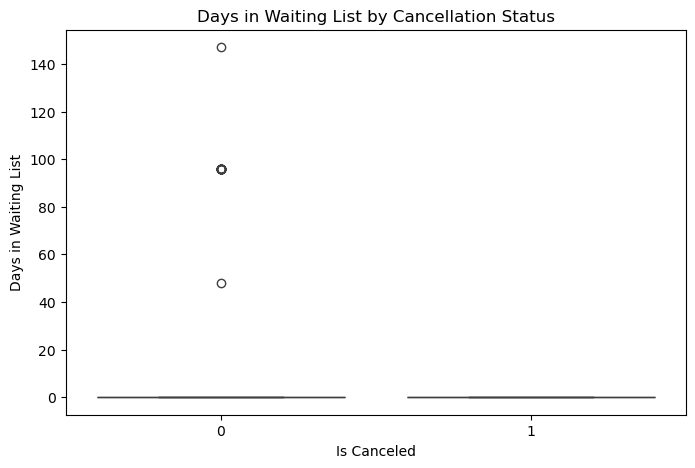

Correlation between waiting days and cancellation: -0.061


In [21]:
# Scatter plot and correlation
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='is_canceled', y='days_in_waiting_list')
plt.title('Days in Waiting List by Cancellation Status')
plt.xlabel('Is Canceled')
plt.ylabel('Days in Waiting List')
plt.show()

# Correlation coefficient
corr = df[['days_in_waiting_list', 'is_canceled']].corr().iloc[0,1]
print(f"Correlation between waiting days and cancellation: {corr:.3f}")


**III. Correlation between waiting list duration and cancellations**
- Boxplot shows no significant difference in waiting days between canceled and non-canceled bookings.
- Correlation = -0.061 → very weak, slightly negative.
→ The longer a booking stays on the waiting list, the less likely it is to be canceled (but effect is negligible).

**Conclusion:**
- Waiting list time does not strongly predict cancellations.
- Operational focus should instead be on channel management and booking changes.

## Task 7: Loyalty Programs and Repeat Business 

### I. What is the behavior of repeated guests with respect to their nature of stay?

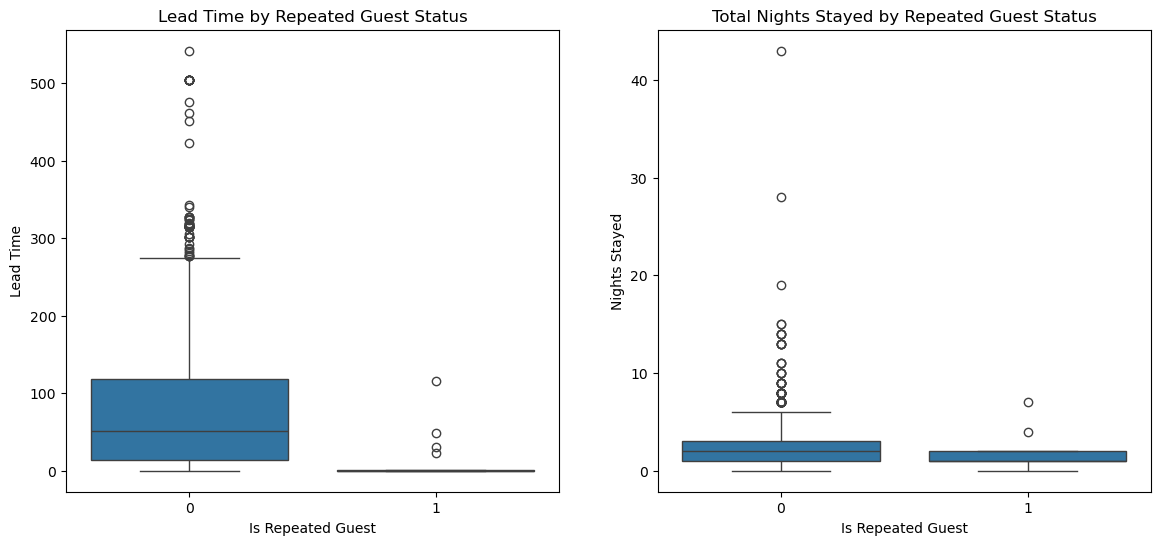

In [22]:
#Box plot for Lead Time vs Repeated Guest Status
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='is_repeated_guest', y='lead_time')
plt.title('Lead Time by Repeated Guest Status')
plt.xlabel('Is Repeated Guest')
plt.ylabel('Lead Time')

#Box plot for Nights Stayed vs Repeated Guest
df['total_nights'] = df['stays_in_week_nights'] + df['stays_in_weekend_nights']

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='is_repeated_guest', y='total_nights')
plt.title('Total Nights Stayed by Repeated Guest Status')
plt.xlabel('Is Repeated Guest')
plt.ylabel('Nights Stayed')
plt.show()


### Interpretation for Task 7: Loyalty Programs and Repeat Business

**I. Behavior of repeated guests with respect to their nature of stay**

From the Lead Time vs. Repeat Guest plots:
- Repeated guests usually book with very short lead times (closer to the check-in date).
- Non-repeated guests tend to have longer and more varied lead times (some booking hundreds of days in advance).

From the Nights Stayed plot:
- Repeated guests generally stay for shorter durations (1–3 nights).
- Non-repeated guests sometimes stay much longer (outliers > 20 nights).

**Insight:** Repeated guests behave more like business or frequent travelers (short, frequent stays), while non-repeated guests include more long-term and advance planners (e.g., vacationers).

### II. How does the success of loyalty programs relate to the accommodation of special requests from customers?

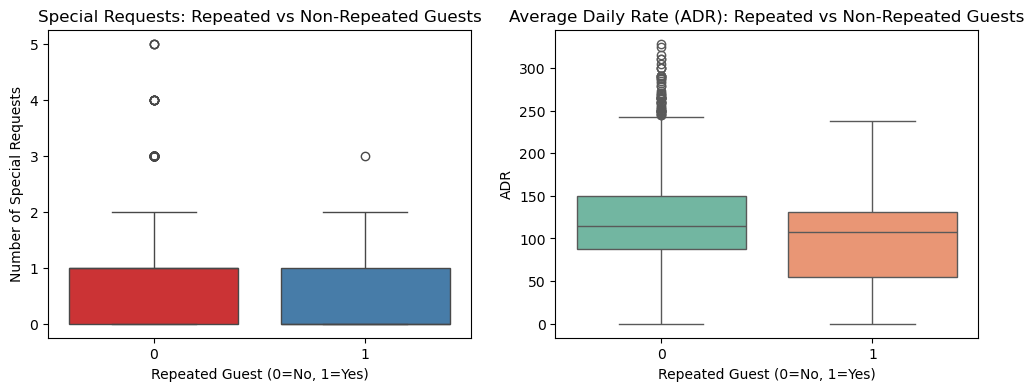

In [23]:
# Average number of special requests for repeated vs non-repeated guests
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='is_repeated_guest', y='total_of_special_requests', palette='Set1')
plt.title('Special Requests: Repeated vs Non-Repeated Guests')
plt.xlabel('Repeated Guest (0=No, 1=Yes)')
plt.ylabel('Number of Special Requests')

# Average ADR for repeated vs non-repeated guests as an indicator of success
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='is_repeated_guest', y='adr', palette='Set2')
plt.title('Average Daily Rate (ADR): Repeated vs Non-Repeated Guests')
plt.xlabel('Repeated Guest (0=No, 1=Yes)')
plt.ylabel('ADR')
plt.show()


**II. Loyalty programs and accommodation of special requests**

From the Special Requests vs. Repeat Guest plot:

- Both repeated and non-repeated guests request special services, but repeated guests often make slightly fewer requests.
- This could suggest that loyalty programs may reduce the need for repeated guests to explicitly ask, because their preferences are already recognized and stored.

From the ADR (Average Daily Rate) plot:
- Repeated guests tend to pay a lower average daily rate compared to non-repeated guests.
- This suggests loyalty programs may give discounts or benefits in exchange for customer retention.

**Insight:** Loyalty programs are successful when they anticipate guest needs (fewer requests needed) and offer competitive rates to keep customers returning.

### III. What factors contribute to repeat business? What is the distribution of lead time for repeated and non-repeated guests?

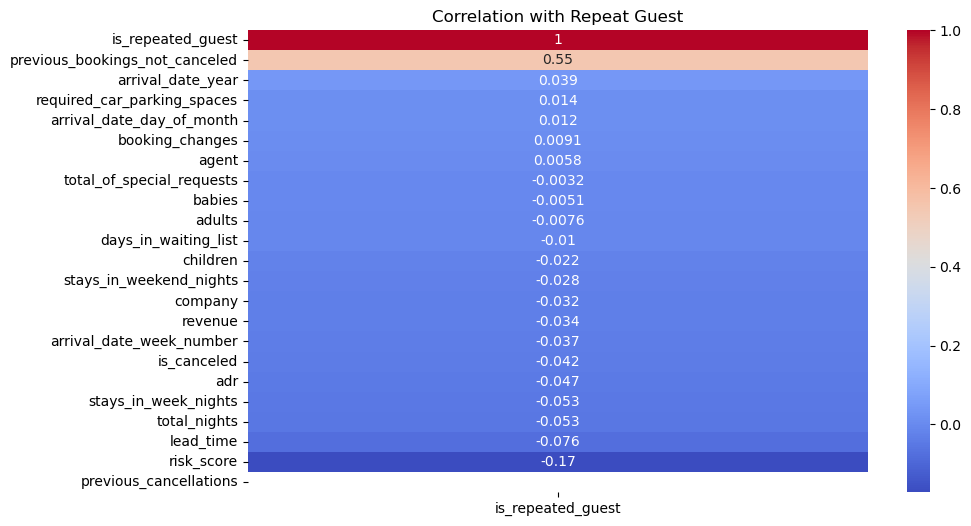

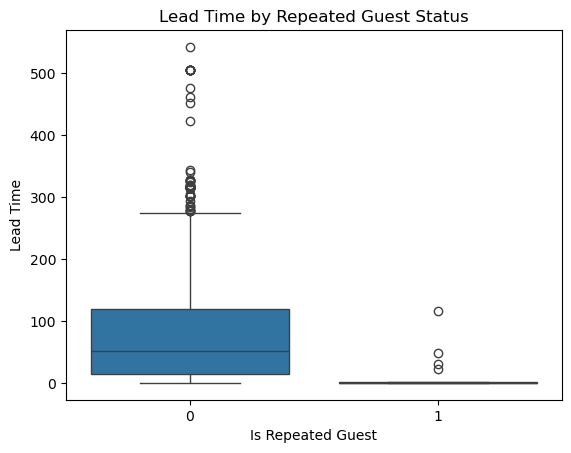

In [24]:
#Heatmap to find factors that contribute to repeat business
numeric_cols = df.select_dtypes(include='number')
correlation = numeric_cols.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation[['is_repeated_guest']].sort_values(by='is_repeated_guest', ascending=False), annot=True, cmap='coolwarm')
plt.title('Correlation with Repeat Guest')
plt.show()

#The distribution of lead time for repeated and non-repeated guests
sns.boxplot(x='is_repeated_guest', y='lead_time', data=df)
plt.title('Lead Time by Repeated Guest Status')
plt.xlabel('Is Repeated Guest')
plt.ylabel('Lead Time')
plt.show()

**III. Factors contributing to repeat business & lead time distribution**

**From the Correlation Heatmap:**
- The biggest positive driver of repeat guests is previous bookings not canceled (0.55 correlation).
- Risk score and previous cancellations negatively affect repeat guests.
- Special requests, ADR, lead time, and total nights have very weak correlations.

**From the Lead Time Distribution plots:**
- Repeated guests have a much tighter, lower distribution of lead times (most book last minute).
- Non-repeated guests are spread across a wide range, with many long advance bookings.

**Factors for repeat business:**
- Reliability (not canceling bookings).
- Lower risk scores (trustworthy profiles).
- Benefits of loyalty programs (lower ADR, anticipated preferences).
- Shorter, frequent stays (business-like patterns).